## Projeto Final - Grupo 05

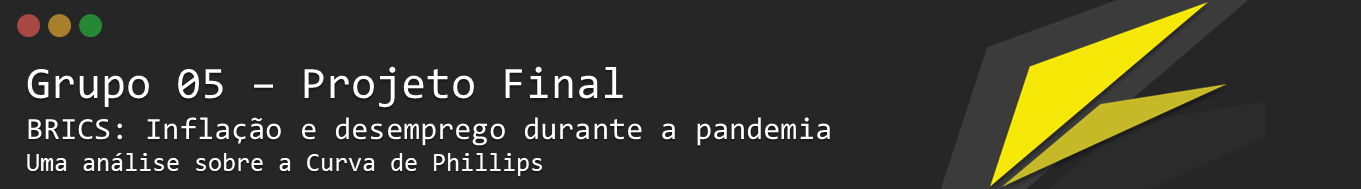

#### BRICS: Inflação e desemprego durante a pandemia
##### Uma análise sobre a Curva de Phillips


#### Gabriel Barrada, Luiza Monteiro, Mônica Ito, Rafael Derrico

**Introdução**

A *Curva de Phillips* é uma proposição macroeconômica que aponta um trade-off entre inflação baixa e desemprego baixo, isto é, inflação e desemprego teriam uma relação negativa.

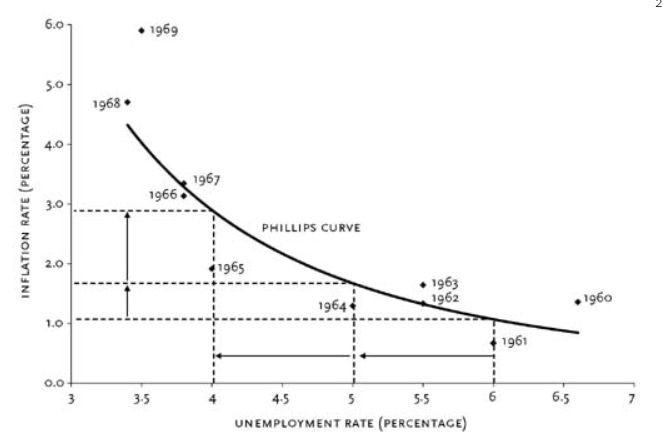

Para países com histórico de uso de inflação como política pública, uma outra formulação da Curva de Phillips é mais adequada, a chamada ‘Curva de Phillips aceleracionista’, que retrata em seu eixo vertical não a taxa de inflação corrente, mas a taxa de variação da inflação. Assim sendo, uma taxa de inflação crescente estaria associada a menores taxas de desemprego:

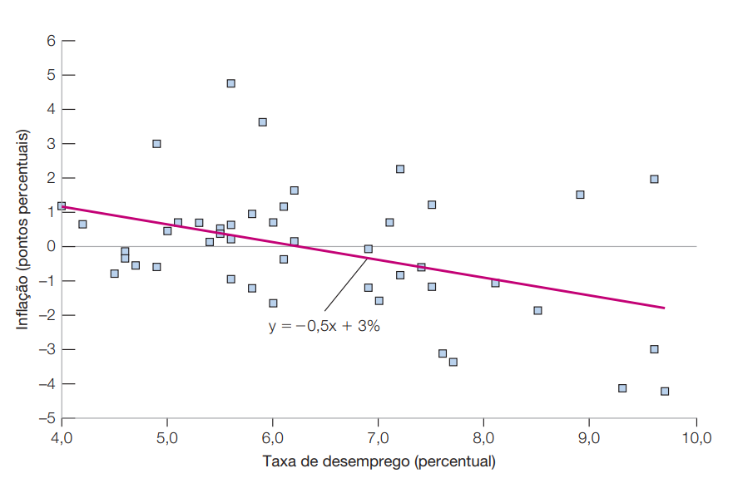

**Hipótese**

Tratando especificamente do BRICS, países emergentes contam com inúmeros casos em que a inflação foi utilizada como forma de política pública contra o desemprego. Assim sendo, a forma adequada da Curva de Phillips para essa análise será da versão aceleracionista.

Em épocas de recessão econômica, é muito comum observarmos o fenômeno da *estagflação*, ou seja, inflação alta sem crescimento econômico, inflação alta com desemprego também alto. No nosso caso esperamos encontrar algo próximo a isso, ou seja, esperamos encontrar, nesse contexto pandêmico, taxas de inflação crescentes juntamente com alto desemprego, configurando-se assim como uma quebra na relação prevista pela Curva de Phillips.

In [1]:
#Importação de bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Base de Dados**

Serão utilizados dados disponibilizados pelo [site do Banco Mundial](https://databank.worldbank.org/BRICS-COUNTRIES2/id/2577ded4#) na seção de World Development Indicators (WDI) de 2014 a 2023 para os países do BRICS. Ela contém estritamente dados de inflação e desemprego desses países para o período especificado, função disponibilizada pelo próprio site.

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#Abrindo a base de dados
#data = pd.read_csv("/content/drive/MyDrive/BRICS_PC_DATA.csv")
data = pd.read_csv('BRICS_PC_DATA.csv')
display(data)
data.info()

,Series Name,Series Code,Country Name,Country Code,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,Brazil,BRA,6.329040,9.029901,8.739144,3.446373,3.664850,3.732976,3.211768,8.301660,9.28010608956873,4.59356282283204
1,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,Russian Federation,RUS,7.823412,15.534405,7.042448,3.683329,2.878297,4.470367,3.381659,6.694459,..,..
2,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,India,IND,6.665657,4.906973,4.948216,3.328173,3.938826,3.729506,6.623437,5.131407,6.69903414079852,5.64914318907925
3,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,China,CHN,1.921642,1.437024,2.000002,1.593136,2.074790,2.899234,2.419422,0.981015,1.97357555739051,0.234836828893051
4,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,South Africa,ZAF,6.129838,4.540642,6.571396,5.184247,4.517165,4.120246,3.210036,4.611672,7.03972661255866,6.0739085322053
5,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,Brazil,BRA,6.755000,8.538000,11.580000,12.792000,12.330000,11.936000,13.697000,13.159000,9.231,7.95
6,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,Russian Federation,RUS,5.160000,5.571000,5.559000,5.212000,4.846000,4.496000,5.589000,4.715000,3.867,3.325
7,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,India,IND,7.992000,7.894000,7.800000,7.723000,7.652000,6.510000,7.859000,6.380000,4.822,4.172
8,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,China,CHN,4.630000,4.650000,4.560000,4.470000,4.310000,4.560000,5.000000,4.550000,4.98,4.67
9,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,South Africa,ZAF,22.606000,22.869000,24.023000,23.992000,24.218000,25.538000,24.339000,28.770000,28.838,27.988


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series Name    12 non-null     object 
 1   Series Code    10 non-null     object 
 2   Country Name   10 non-null     object 
 3   Country Code   10 non-null     object 
 4   2014 [YR2014]  10 non-null     float64
 5   2015 [YR2015]  10 non-null     float64
 6   2016 [YR2016]  10 non-null     float64
 7   2017 [YR2017]  10 non-null     float64
 8   2018 [YR2018]  10 non-null     float64
 9   2019 [YR2019]  10 non-null     float64
 10  2020 [YR2020]  10 non-null     float64
 11  2021 [YR2021]  10 non-null     float64
 12  2022 [YR2022]  10 non-null     object 
 13  2023 [YR2023]  10 non-null     object 
dtypes: float64(8), object(6)
memory usage: 1.8+ KB


#### Após dar um display nos dados, percebemos duas mudanças que precisarão, de imediato, serem feitas:
- Remoção das 5 últimas linhas
- Preenchimento dos dados vazios de inflação para a Rússia nos anos de 2022 e 2023.

In [4]:
# Removendo as últimas 5 linhas:
data = data.iloc[:-5]
display(data)

,Series Name,Series Code,Country Name,Country Code,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,Brazil,BRA,6.329040,9.029901,8.739144,3.446373,3.664850,3.732976,3.211768,8.301660,9.28010608956873,4.59356282283204
1,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,Russian Federation,RUS,7.823412,15.534405,7.042448,3.683329,2.878297,4.470367,3.381659,6.694459,..,..
2,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,India,IND,6.665657,4.906973,4.948216,3.328173,3.938826,3.729506,6.623437,5.131407,6.69903414079852,5.64914318907925
3,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,China,CHN,1.921642,1.437024,2.000002,1.593136,2.074790,2.899234,2.419422,0.981015,1.97357555739051,0.234836828893051
4,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,South Africa,ZAF,6.129838,4.540642,6.571396,5.184247,4.517165,4.120246,3.210036,4.611672,7.03972661255866,6.0739085322053
5,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,Brazil,BRA,6.755000,8.538000,11.580000,12.792000,12.330000,11.936000,13.697000,13.159000,9.231,7.95
6,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,Russian Federation,RUS,5.160000,5.571000,5.559000,5.212000,4.846000,4.496000,5.589000,4.715000,3.867,3.325
7,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,India,IND,7.992000,7.894000,7.800000,7.723000,7.652000,6.510000,7.859000,6.380000,4.822,4.172
8,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,China,CHN,4.630000,4.650000,4.560000,4.470000,4.310000,4.560000,5.000000,4.550000,4.98,4.67
9,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,South Africa,ZAF,22.606000,22.869000,24.023000,23.992000,24.218000,25.538000,24.339000,28.770000,28.838,27.988


#### Agora, para preencher os dados faltantes para a Rússia:
- Buscamos na internet os valores para a inflação CPI da Rússia nos anos de 2022 e 2023, e encontramos no site https://www.investing.com/economic-calendar/russian-cpi-1180 que eles foram, ao final do período, respectivamente, 12.0% e 7.5%. Para inserir esses valores em seus devidos lugares, basta que usemos o loc.

In [5]:
# Os valores faltantes estão na linha 1, então:
data.loc[1, '2022 [YR2022]'] = 12.0
data.loc[1, '2023 [YR2023]'] = 7.5

display(data)
data.info()

,Series Name,Series Code,Country Name,Country Code,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,Brazil,BRA,6.329040,9.029901,8.739144,3.446373,3.664850,3.732976,3.211768,8.301660,9.28010608956873,4.59356282283204
1,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,Russian Federation,RUS,7.823412,15.534405,7.042448,3.683329,2.878297,4.470367,3.381659,6.694459,12.0,7.5
2,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,India,IND,6.665657,4.906973,4.948216,3.328173,3.938826,3.729506,6.623437,5.131407,6.69903414079852,5.64914318907925
3,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,China,CHN,1.921642,1.437024,2.000002,1.593136,2.074790,2.899234,2.419422,0.981015,1.97357555739051,0.234836828893051
4,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,South Africa,ZAF,6.129838,4.540642,6.571396,5.184247,4.517165,4.120246,3.210036,4.611672,7.03972661255866,6.0739085322053
5,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,Brazil,BRA,6.755000,8.538000,11.580000,12.792000,12.330000,11.936000,13.697000,13.159000,9.231,7.95
6,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,Russian Federation,RUS,5.160000,5.571000,5.559000,5.212000,4.846000,4.496000,5.589000,4.715000,3.867,3.325
7,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,India,IND,7.992000,7.894000,7.800000,7.723000,7.652000,6.510000,7.859000,6.380000,4.822,4.172
8,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,China,CHN,4.630000,4.650000,4.560000,4.470000,4.310000,4.560000,5.000000,4.550000,4.98,4.67
9,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,South Africa,ZAF,22.606000,22.869000,24.023000,23.992000,24.218000,25.538000,24.339000,28.770000,28.838,27.988


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series Name    10 non-null     object 
 1   Series Code    10 non-null     object 
 2   Country Name   10 non-null     object 
 3   Country Code   10 non-null     object 
 4   2014 [YR2014]  10 non-null     float64
 5   2015 [YR2015]  10 non-null     float64
 6   2016 [YR2016]  10 non-null     float64
 7   2017 [YR2017]  10 non-null     float64
 8   2018 [YR2018]  10 non-null     float64
 9   2019 [YR2019]  10 non-null     float64
 10  2020 [YR2020]  10 non-null     float64
 11  2021 [YR2021]  10 non-null     float64
 12  2022 [YR2022]  10 non-null     object 
 13  2023 [YR2023]  10 non-null     object 
dtypes: float64(8), object(6)
memory usage: 1.2+ KB


#### Note que ainda assim as colunas referentes a 2022 e 2023 seguem com seu dtype sendo object e não float64, então devemos mudar isso

In [6]:
data['2022 [YR2022]'] = pd.to_numeric(data['2022 [YR2022]'], errors='coerce')
data['2023 [YR2023]'] = pd.to_numeric(data['2023 [YR2023]'], errors='coerce')
display(data)
data.info()

,Series Name,Series Code,Country Name,Country Code,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,Brazil,BRA,6.329040,9.029901,8.739144,3.446373,3.664850,3.732976,3.211768,8.301660,9.280106,4.593563
1,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,Russian Federation,RUS,7.823412,15.534405,7.042448,3.683329,2.878297,4.470367,3.381659,6.694459,12.000000,7.500000
2,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,India,IND,6.665657,4.906973,4.948216,3.328173,3.938826,3.729506,6.623437,5.131407,6.699034,5.649143
3,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,China,CHN,1.921642,1.437024,2.000002,1.593136,2.074790,2.899234,2.419422,0.981015,1.973576,0.234837
4,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,South Africa,ZAF,6.129838,4.540642,6.571396,5.184247,4.517165,4.120246,3.210036,4.611672,7.039727,6.073909
5,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,Brazil,BRA,6.755000,8.538000,11.580000,12.792000,12.330000,11.936000,13.697000,13.159000,9.231000,7.950000
6,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,Russian Federation,RUS,5.160000,5.571000,5.559000,5.212000,4.846000,4.496000,5.589000,4.715000,3.867000,3.325000
7,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,India,IND,7.992000,7.894000,7.800000,7.723000,7.652000,6.510000,7.859000,6.380000,4.822000,4.172000
8,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,China,CHN,4.630000,4.650000,4.560000,4.470000,4.310000,4.560000,5.000000,4.550000,4.980000,4.670000
9,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,South Africa,ZAF,22.606000,22.869000,24.023000,23.992000,24.218000,25.538000,24.339000,28.770000,28.838000,27.988000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series Name    10 non-null     object 
 1   Series Code    10 non-null     object 
 2   Country Name   10 non-null     object 
 3   Country Code   10 non-null     object 
 4   2014 [YR2014]  10 non-null     float64
 5   2015 [YR2015]  10 non-null     float64
 6   2016 [YR2016]  10 non-null     float64
 7   2017 [YR2017]  10 non-null     float64
 8   2018 [YR2018]  10 non-null     float64
 9   2019 [YR2019]  10 non-null     float64
 10  2020 [YR2020]  10 non-null     float64
 11  2021 [YR2021]  10 non-null     float64
 12  2022 [YR2022]  10 non-null     float64
 13  2023 [YR2023]  10 non-null     float64
dtypes: float64(10), object(4)
memory usage: 1.2+ KB


Agora sim!



---



#### Mais uma mudança que vamos fazer é alterar os nomes das colunas dos anos para que contenham apenas os anos em si:

In [7]:
colunas_antigas = list(data.columns) #criamos uma lista com os nomes das colunas originais
colunas_novas = {} #iniciamos um dicionário vazio que será usado como argumento para o método .rename

for coluna in colunas_antigas:
    if '[YR' in coluna: #utilizamos a string '[YR' para identificar as colunas que desejamos renomear
        nome_novo = coluna.split(' ')[0] #utilizamos o método .split() que divide uma string numa lista a partir de um separador, que no caso é um espaço, e selecionamos item 0 da lista
        colunas_novas[coluna] = nome_novo

print(colunas_novas)
data.rename(columns=colunas_novas, inplace=True)
display(data)

{'2014 [YR2014]': '2014', '2015 [YR2015]': '2015', '2016 [YR2016]': '2016', '2017 [YR2017]': '2017', '2018 [YR2018]': '2018', '2019 [YR2019]': '2019', '2020 [YR2020]': '2020', '2021 [YR2021]': '2021', '2022 [YR2022]': '2022', '2023 [YR2023]': '2023'}


,Series Name,Series Code,Country Name,Country Code,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,Brazil,BRA,6.329040,9.029901,8.739144,3.446373,3.664850,3.732976,3.211768,8.301660,9.280106,4.593563
1,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,Russian Federation,RUS,7.823412,15.534405,7.042448,3.683329,2.878297,4.470367,3.381659,6.694459,12.000000,7.500000
2,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,India,IND,6.665657,4.906973,4.948216,3.328173,3.938826,3.729506,6.623437,5.131407,6.699034,5.649143
3,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,China,CHN,1.921642,1.437024,2.000002,1.593136,2.074790,2.899234,2.419422,0.981015,1.973576,0.234837
4,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,South Africa,ZAF,6.129838,4.540642,6.571396,5.184247,4.517165,4.120246,3.210036,4.611672,7.039727,6.073909
5,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,Brazil,BRA,6.755000,8.538000,11.580000,12.792000,12.330000,11.936000,13.697000,13.159000,9.231000,7.950000
6,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,Russian Federation,RUS,5.160000,5.571000,5.559000,5.212000,4.846000,4.496000,5.589000,4.715000,3.867000,3.325000
7,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,India,IND,7.992000,7.894000,7.800000,7.723000,7.652000,6.510000,7.859000,6.380000,4.822000,4.172000
8,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,China,CHN,4.630000,4.650000,4.560000,4.470000,4.310000,4.560000,5.000000,4.550000,4.980000,4.670000
9,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,South Africa,ZAF,22.606000,22.869000,24.023000,23.992000,24.218000,25.538000,24.339000,28.770000,28.838000,27.988000


#### Para facilitar o entendimento na hora de criar as visualizações, vamos criar dataframes individuais para cada um dos países.
- Para isso, nada melhor do que um loop!

In [8]:
paises = data['Country Name'].unique()
#print(paises)
data_paises_dict = {}
            #iniciamos um dicionário que vai armazenar os dados de cada um dos países individualmente
for pais in paises:
    #Primeiro criamos dataframes que partem do df original e 'filtram' apenas os valores de um país para, respectivamente, inflação e desemprego
    data_inflacao_pais = data[(data['Country Name'] == pais) & (data['Series Name'] == "Inflation, consumer prices (annual %)")]
    data_desemprego_pais = data[(data['Country Name'] == pais) & (data['Series Name'] == "Unemployment, total (% of total labor force) (modeled ILO estimate)")]

    #Agora, vamos selecionar apenas as colunas que nos interessam (2014 ~ 2023), transpor o df, e renomear as colunas para algo mais fácil
    data_inflacao_pais = data_inflacao_pais.iloc[:,4:].T
                            #todas as linhas, e a partir da 4ª coluna
    data_inflacao_pais.columns = ['Inflação']

    #Agora o mesmo para o desemprego
    data_desemprego_pais = data_desemprego_pais.iloc[:, 4:].T
    data_desemprego_pais.columns = ['Desemprego']

    #Agora, vamos juntar tudo!
    data_PC_pais = pd.concat([data_inflacao_pais, data_desemprego_pais], axis=1).reset_index()
    data_PC_pais.columns = ['Ano', 'Inflação', 'Desemprego']

    #Adicionamos, então, uma coluna que contenha a taxa de variação da inflação, a fim de termos informações da curva de phillips aceleracionista:
    data_PC_pais['Inflação_varpct'] = (data_PC_pais['Inflação'].pct_change()*100)

    #Como a primeira linha, que possui variação percentual igual a zero, não irá interessar para a análise, vamos sumir com ela
    data_PC_pais = data_PC_pais.shift(periods=-1)
    data_PC_pais = data_PC_pais.iloc[:-1]

    #E, por fim, armazenamos os dataframes no dicionário:
    data_paises_dict[pais] = data_PC_pais

#Agora, finalmente, damos nomes a cada um dos dataframes para podermos usá-los na visualização individualmente
#print(data_paises_dict)
data_PC_brasil = data_paises_dict['Brazil']
print('Brasil:\n',data_PC_brasil)

data_PC_russia = data_paises_dict['Russian Federation']
data_PC_india = data_paises_dict['India']
data_PC_china = data_paises_dict['China']
data_PC_southafrica = data_paises_dict['South Africa']

Brasil:
     Ano  Inflação  Desemprego  Inflação_varpct
0  2015  9.029901       8.538        42.674099
1  2016  8.739144      11.580        -3.219941
2  2017  3.446373      12.792       -60.563946
3  2018  3.664850      12.330         6.339329
4  2019  3.732976      11.936         1.858901
5  2020  3.211768      13.697       -13.962269
6  2021  8.301660      13.159       158.476318
7  2022  9.280106       9.231        11.786153
8  2023  4.593563       7.950       -50.500966


## Uma vez que preparamos devidamente nossos dados, agora vamos partir para as visualizações!

A primeira coisa que interessa, antes de falarmos da Curva de Phillips em si, é conhecer a evolução da inflação e do desemprego nos países do BRICS durante o período. Isso pode vir a elucidar os resultados que encontrarmos.

  Num primeiro momento, vamos criar plots que mostrem, para cada país individualmente, a evolução desses indicadores ao longo dos anos. Para isso, nada melhor que uma função:

In [9]:
def graph_linha(df, pais):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.set(style="ticks")
    plt.style.use('dark_background')

    sns.lineplot(data=df, x='Ano', y='Inflação', color='Yellow', ax=axes[0])
    sns.scatterplot(data=df, x='Ano', y='Inflação', color='White', ax=axes[0])
    axes[0].set_title(f"Inflação - {pais}")

    sns.lineplot(data=df, x='Ano', y='Desemprego', color='Yellow', ax=axes[1])
    sns.scatterplot(data=df, x='Ano', y='Desemprego', color='White', ax=axes[1])
    axes[1].set_title(f"Taxa de desemprego - {pais}")

    plt.show()

Agora, sempre que quisermos ver como os indicadores evoluíram ao longo do tempo para um país específico, basta chamarmos a função com os argumentos pertinentes ao país

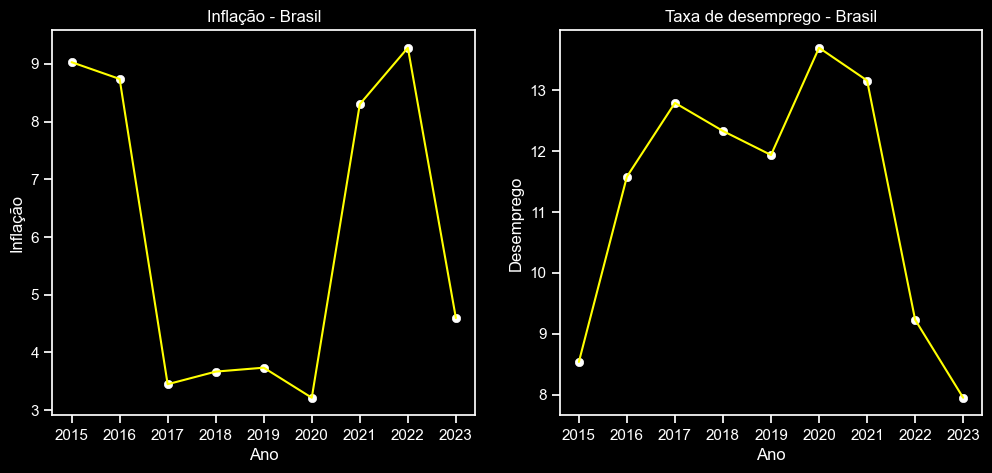

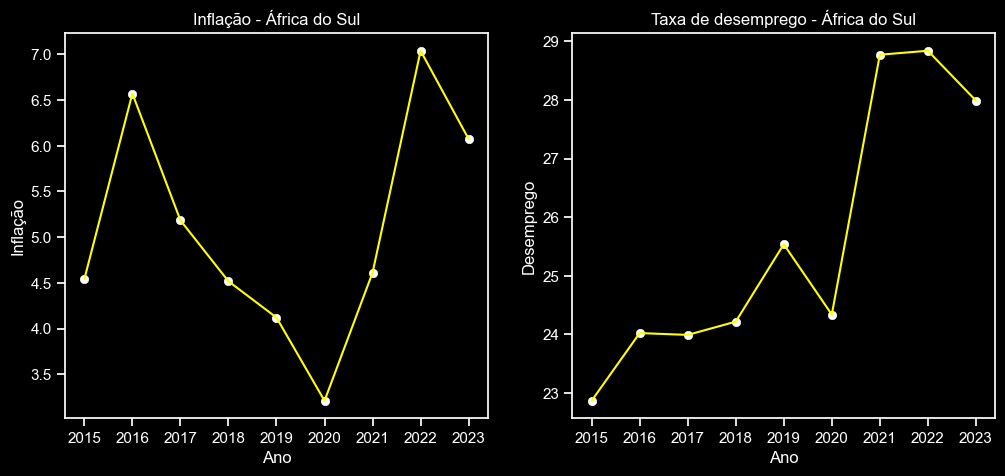

In [14]:
graph_linha(data_PC_brasil,"Brasil")
graph_linha(data_PC_southafrica,"África do Sul")

### No exemplo acima do Brasil e da África do Sul, apesar da inflação estar em patamares semelhantes, podemos ver que a escala do nível de desemprego é bem diferente.

### Isso evoca a necessidade de um gráfico que una a variação de todos os países num só plot, a fim de possibilitar comparações.

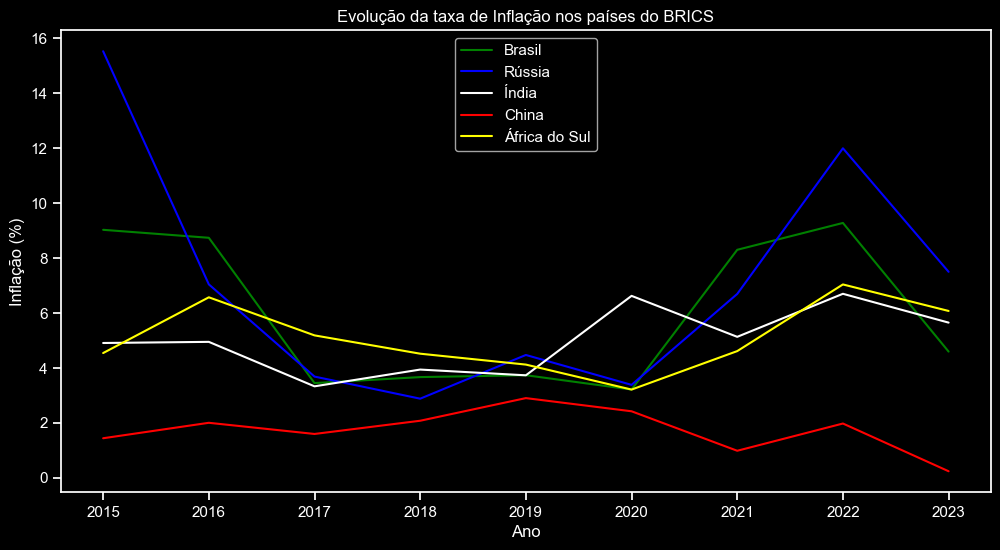

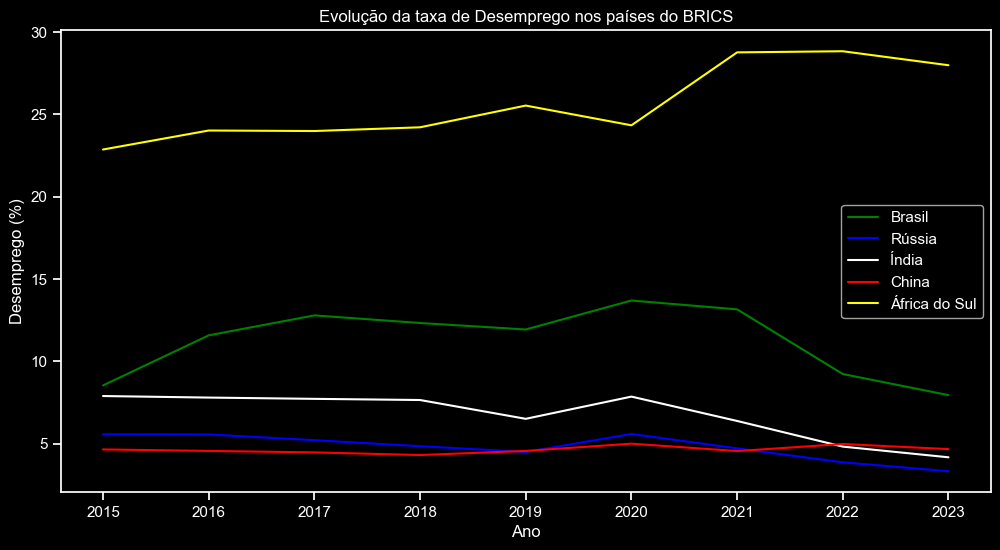

In [11]:
for indicador in ['Inflação', 'Desemprego']:
    plt.figure(figsize=(12,6))
    sns.lineplot(data=data_PC_brasil, x='Ano', y=indicador, label='Brasil', color='green')
    sns.lineplot(data=data_PC_russia, x='Ano', y=indicador, label='Rússia', color='blue')
    sns.lineplot(data=data_PC_india, x='Ano', y=indicador, label='Índia', color='white')
    sns.lineplot(data=data_PC_china, x='Ano', y=indicador, label='China', color='red')
    sns.lineplot(data=data_PC_southafrica, x='Ano', y=indicador, label='África do Sul', color='yellow')

    plt.title('Evolução da taxa de '+indicador+' nos países do BRICS')
    plt.xlabel('Ano')
    plt.ylabel(indicador +' (%)')

    plt.show()

### Feito isso, vamos analisar de fato as Curvas de Phillips!

Montamos aqui também uma função que pede como argumentos os dados e o país.

Lembrando que, como citado anteriormente, estamos tratando da Curva de Phillips aceleracionista e, portanto, o eixo y conterá a VARIAÇÃO da inflação, e não o nível.

In [12]:
def plotPC(data, pais):
    plt.figure(figsize=(10,10))
    sns.set(style="ticks")
    plt.style.use('dark_background')
    sns.scatterplot(data=data, x=data['Desemprego'], y=data['Inflação_varpct']).axhline(0, color='white', linestyle='--', linewidth=1)
    sns.regplot(data=data, x=data['Desemprego'], y=data['Inflação_varpct'], ci=None, color='yellow')

    for ponto in range(len(data_PC_brasil)):
        plt.text(x=data['Desemprego'][ponto], y=data['Inflação_varpct'][ponto]+2, s=data['Ano'][ponto],ha='center')



    plt.title('Curva de Phillips para ' + str(pais))
    plt.xlabel('Taxa de desemprego')
    plt.ylabel('Variação percentual da inflação')

    plt.show()

Feita a função, podemos finalmente plotar e analisar a Curva de Phillips para cada um dos países. Relembrando:


*   A Curva de Phillips aceleracionista prevê uma relação **negativa** entre variação da inflação e o nível de desemprego
*   Nossa hipótese é de que em épocas de recessão, como o contexto pandêmico, essa relação vai se quebrar, e encontraremos, nesse caso, **inflação crescente com taxa alta de desemprego**.

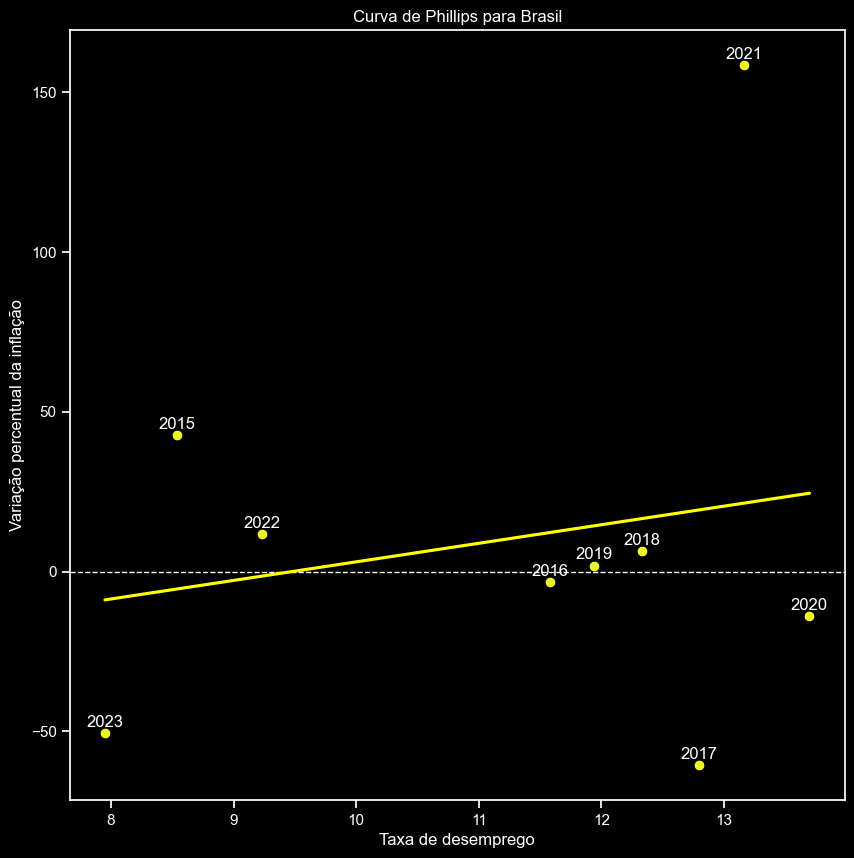

In [15]:

plotPC(data_PC_brasil, 'Brasil')
# plotPC(data_PC_russia, 'Rússia')
# plotPC(data_PC_india, 'Índia')
# plotPC(data_PC_china, 'China')
# plotPC(data_PC_southafrica, 'África do Sul')

### **Brasil, Índia e África do Sul:**
Conforme nossa hipótese inicial, nos anos em que os países, individualmente, estavam sendo mais afetados pelas consequências econômicas da pandemia, notamos grandes outliers no canto superior direito de seus plots. Isso mostra **níveis crescentes de inflação não sendo acompanhados por uma resposta na taxa de desemprego**. Isso configura a prevista quebra na relação da Curva de Phillips em épocas de recessão. Vale ressaltar que para todos esses países, a regressão linear não mostra nem mesmo uma relação negativa, tamanhos os outliers em período pandêmico.

### **China e Rússia:**
Diferentemente dos países anteriores, a China e a Rússia não apresentaram resultados muito conclusivos ou alinhados com nossa hipótese inicial. Entendemos que a divergência nos resultados encontrados pode ter raíz em duas situações diferentes:


*   **Nossa hipótese é falha para esses países;**
*   **Seus contextos individuais podem ter nuances mais profundos.**

A primeira coisa a ser notada a respeito desses países é que suas **taxas de desemprego são altamente estáveis** no período analisado, como é possível observar no plot de *Evolução do Desemprego nos países do BRICS*.

Além disso, não podemos dizer que esses países têm um bom histórico no quesito de **transparência em seus dados econômicos e sociais divulgados**, podendo levar a um **prejuízo nas estimativas do Banco Mundial**, já que dados confiáveis são mais escassos.

Vale ressaltar que a **Rússia** foi o único país a apresentar uma curva, de fato, **negativamente inclinada**.

Acreditamos, em suma, que essas diferenças podem emergir de uma condução diferenciada das políticas econômicas durante o período da pandemia, ou ainda peculiaridades no contexto específico desses países.